## Imports

In [33]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.decompositioncs import mean_absolute_error, mean_squared_error, r2_score

## Load data and cleaning

In [2]:
df = pd.read_csv('data/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.drop(columns=['name', 'host_name', 'id', 'host_id'], inplace=True)

In [4]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     38843 non-null  datetime64[ns]
 9   reviews_per_month               38843 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [6]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


## Engineering

In [7]:
df['last_review'].min(), df['last_review'].max()

(Timestamp('2011-03-28 00:00:00'), Timestamp('2019-07-08 00:00:00'))

In [8]:
last_day = df['last_review'].max()
df['days_since_last_review'] = df['last_review'].apply(lambda x: (last_day - x).days)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,262.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,48.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,NaN
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,NaN
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,NaN
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,NaN


In [9]:
df[['neighbourhood_group', 'last_review']].query("last_review.isna()").fillna(1).groupby(by='neighbourhood_group').count()

,last_review
neighbourhood_group,
Bronx,215
Brooklyn,3657
Manhattan,5029
Queens,1092
Staten Island,59


In [10]:
df[['neighbourhood_group', 'last_review']].query("~last_review.isna()").fillna(1).groupby(by='neighbourhood_group').count()

,last_review
neighbourhood_group,
Bronx,876
Brooklyn,16447
Manhattan,16632
Queens,4574
Staten Island,314


In [11]:
#de inicio, fazendo um dropna, depois, ver se os resultados melhoram ao fazer a mediana ou média
df.dropna(inplace=True)

/tmp/ipykernel_6181/2043966879.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'))


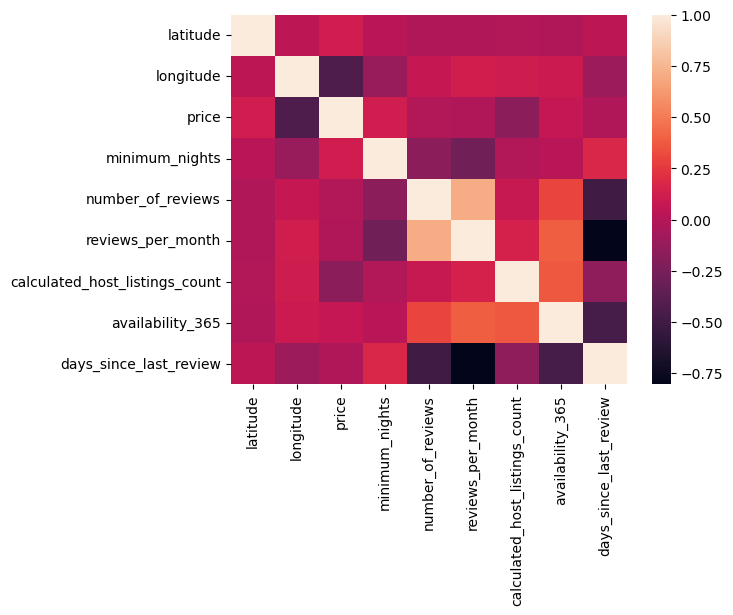

In [12]:
sns.heatmap(df.corr(method='spearman'))
plt.xticks(rotation=90);

In [13]:
df = pd.concat([df, pd.get_dummies(df['neighbourhood_group']), 
               pd.get_dummies(df['neighbourhood']), 
               pd.get_dummies(df['room_type'])], 
               axis=1)

In [14]:
df.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], inplace=True)
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,Bronx,...,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,262.0,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,48.0,0,...,0,0,0,0,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,3.0,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,231.0,0,...,0,0,0,0,0,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,0.59,1,129,16.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,129,1,1,1.00,1,147,1.0,0,...,0,0,0,0,0,0,0,0,1,0
48790,40.75104,-73.81459,45,1,1,1.00,6,339,1.0,0,...,0,0,0,0,0,0,0,0,1,0
48799,40.54179,-74.14275,235,1,1,1.00,1,87,1.0,0,...,0,0,0,0,0,0,0,0,1,0
48805,40.80787,-73.92400,100,1,2,2.00,1,40,1.0,1,...,0,0,0,0,0,0,0,1,0,0


## Prediction

### Price

In [15]:
x = df.drop(columns='price')
y = df[['price']]

In [16]:
x_scaler = MinMaxScaler()
x_scaled = pd.DataFrame(x_scaler.fit_transform(x), columns=x.columns)
x_scaled

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,Bronx,Brooklyn,...,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodside,Entire home/apt,Private room,Shared room
0,0.346932,0.511921,0.000000,0.012739,0.003419,0.015337,1.000000,0.086640,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.607918,0.490469,0.000000,0.070064,0.006326,0.003067,0.972603,0.015873,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.439518,0.535649,0.000000,0.428344,0.079159,0.000000,0.531507,0.000992,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.718308,0.565324,0.007206,0.012739,0.001539,0.000000,0.000000,0.076389,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.593287,0.506972,0.001601,0.116242,0.009916,0.000000,0.353425,0.005291,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38838,0.675224,0.547128,0.000000,0.000000,0.016926,0.000000,0.402740,0.000331,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38839,0.601574,0.808818,0.000000,0.000000,0.016926,0.015337,0.928767,0.000331,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38840,0.087004,0.191314,0.000000,0.000000,0.016926,0.000000,0.238356,0.000331,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38841,0.741325,0.602939,0.000000,0.001592,0.034023,0.000000,0.109589,0.000331,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y).ravel()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, train_size=0.8, random_state=20)
len(x_train), len(x_test)

(31074, 7769)

#### Random Forest

In [20]:
model = RandomForestRegressor(criterion='absolute_error', min_samples_split=4, min_samples_leaf=4, max_features='sqrt', n_jobs=10)
model.fit(x_train, y_train.ravel())

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=4, n_jobs=10)

In [21]:
[estimator.tree_.max_depth for estimator in model.estimators_]

[34,
 36,
 45,
 36,
 46,
 37,
 32,
 46,
 37,
 46,
 33,
 38,
 32,
 45,
 39,
 42,
 39,
 32,
 45,
 54,
 43,
 36,
 38,
 31,
 29,
 47,
 40,
 36,
 42,
 38,
 33,
 39,
 47,
 35,
 41,
 41,
 41,
 41,
 35,
 42,
 43,
 44,
 38,
 50,
 37,
 34,
 49,
 39,
 42,
 35,
 53,
 43,
 39,
 39,
 38,
 30,
 39,
 45,
 34,
 39,
 31,
 33,
 35,
 50,
 39,
 42,
 39,
 35,
 38,
 39,
 39,
 39,
 41,
 37,
 34,
 40,
 41,
 30,
 47,
 37,
 32,
 47,
 31,
 34,
 40,
 29,
 39,
 40,
 40,
 50,
 36,
 50,
 35,
 39,
 42,
 35,
 33,
 36,
 39,
 38]

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

In [24]:
print("rmse:", mean_squared_error(y_test, y_pred) ** (1/2))
print("mae:", mean_absolute_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

rmse: 176.6030394086386
mae: 47.66013129102844
r2: 0.14522644435598198


In [25]:
y_test.mean(), y_pred.mean()

(139.90153172866522, 121.6896897927661)

Text(0, 0.5, 'Predicted')

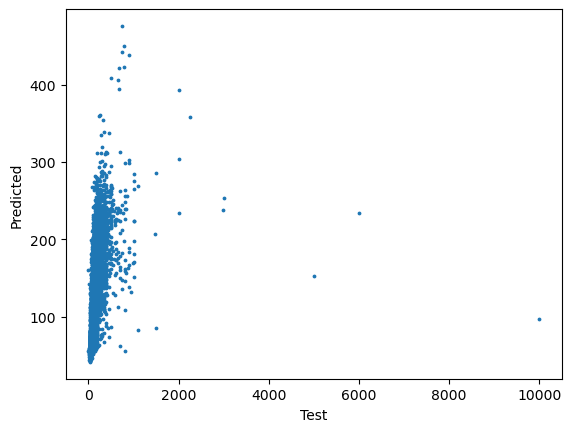

In [31]:
plt.scatter(y_test, y_pred, s=3)
plt.xlabel("Test")
plt.ylabel("Predicted")

In [32]:
mlflow.set_experiment("random_forest_regressor")

min_samples_split_list = [2, 4, 6, 8, 10]
min_samples_leaf_list = [2, 4, 6, 8, 10]
max_features_list = ['sqrt', 'log2', 1, 0.75, 0.5]
n_estimators_list = [100]
for min_samples_split in min_samples_split_list:
    for min_samples_leaf in min_samples_leaf_list:
        for max_features in max_features_list:
            for n_estimators in n_estimators_list:
                
                with mlflow.start_run():
                    model = RandomForestRegressor(criterion='absolute_error', 
                                                  min_samples_split=min_samples_split, 
                                                  min_samples_leaf=min_samples_leaf, 
                                                  max_features=max_features, 
                                                  n_estimators=n_estimators, n_jobs=10)
                    print(model)
                    model.fit(x_train, y_train.ravel())
                    y_pred = model.predict(x_test)

                    y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
                    y_t = y_scaler.inverse_transform(y_test.reshape(-1, 1))
                
                    mlflow.log_param('n_estimators', n_estimators)
                    mlflow.log_param('criterion', 'absolute_error')
                    mlflow.log_param('min_samples_split', min_samples_split)
                    mlflow.log_param('max_features', max_features)
                    mlflow.log_param('min_samples_leaf', min_samples_leaf)
                    
                    scores = cross_validate(model, x_scaled, y_scaled, cv=5,
                        scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'),
                        return_train_score=False)
                    
                    r2 = scores['test_r2'].mean()
                    rmse = y_scaler.inverse_transform([scores['test_neg_root_mean_squared_error'] * -1])[0].mean()
                    mae = y_scaler.inverse_transform([scores['test_neg_mean_absolute_error'] * -1])[0].mean()
                    
                    mlflow.log_metric("r2", r2)
                    mlflow.log_metric("rmse", rmse)
                    mlflow.log_metric("mae", mae)
                    
                mlflow.end_run()

2022/12/08 20:48:35 INFO mlflow.tracking.fluent: Experiment with name 'random_forest_regressor' does not exist. Creating a new experiment.


RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      min_samples_leaf=2, n_jobs=10)
RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      min_samples_leaf=2, n_jobs=10)
RandomForestRegressor(criterion='absolute_error', max_features=1,
                      min_samples_leaf=2, n_jobs=10)
RandomForestRegressor(criterion='absolute_error', max_features=0.75,
                      min_samples_leaf=2, n_jobs=10)
RandomForestRegressor(criterion='absolute_error', max_features=0.5,
                      min_samples_leaf=2, n_jobs=10)
RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      min_samples_leaf=4, n_jobs=10)
RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      min_samples_leaf=4, n_jobs=10)
RandomForestRegressor(criterion='absolute_error', max_features=1,
                      min_samples_leaf=4, n_jobs=10)
RandomForestRegressor(c

In [34]:
model = RandomForestRegressor(criterion='absolute_error', min_samples_split=8, min_samples_leaf=10, max_features=0.5, n_jobs=10)
print("Best model:", model)

Best model: RandomForestRegressor(criterion='absolute_error', max_features=0.5,
                      min_samples_leaf=10, min_samples_split=8, n_jobs=10)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, train_size=0.8)
len(x_train), len(x_test)

(31074, 7769)

In [36]:
model.fit(x_train, y_train.ravel())

RandomForestRegressor(criterion='absolute_error', max_features=0.5,
                      min_samples_leaf=10, min_samples_split=8, n_jobs=10)

In [37]:
y_pred = model.predict(x_test)

In [38]:
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

In [39]:
print("rmse:", mean_squared_error(y_test, y_pred) ** (1/2))
print("mae:", mean_absolute_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

rmse: 151.2861237353557
mae: 45.599151756982884
r2: 0.21024747676258027
